<a href="https://colab.research.google.com/github/Rbca0/Data-Science/blob/main/Unit2/RebevanBU2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Context: Rick Riodran is the author of many YA fantasy books including the Percy Jackson and the Olympians, a highly renowned series about an ADHD teenager and his friends fighting monsters from Greek mythology. In an effort to expand the world mythologies included in series' like his, he has started a program called Rick Riordan presents. In RRP, Riordan sponsors authors to write books about different world cultures and they get increased publicicty and editing help. I have not read very many RRP books, but I am curious as to whether any of them are better than the original series.

Prior: A reasonable guess would be that because Riordan is backing these books, they will be similar in quality to his. My prior is that the books from RRP will be equal in rating to the original Percy Jackson quintet, which is 4.389 stars according to Goodreads. Basically, I am assuming the average rating for the Percy Jackson books is approximately equal to the number of 5 star raings for the RRP books.

Data: To get binomial data on all Rick Riodan Presents books, I went to Goodreads and recorded the number of ratings with 5 stars for each of the books, 16 total. The 'makes' were all the ratings above 4.38 (only 5) because that was the average from the Percy Jackson books, and the 'misses' were all the ratings under 5 stars. I aggregated the data from each book to find the total proportion of 5 star ratings.

 data for first 5 percy jackson books from goodreads                         
4.54 avg rating — 46,380 ratings                                      
4.24 avg rating — 1,329,388 ratings                            
4.37 avg rating — 1,187,966 ratings                            
4.42 avg rating — 1,194,786 ratings                                
4.55 avg rating — 1,123,143 ratings                       
all data from PJ1-5 star rating(4.54*46380+ 4.24*1329388+ 4.37*1187966+ 4.42*1194786+ 4.55*1123143)/(46380+1329388+1187966+1194786+1123143)=4.38986396849



all data from RRP 5 stars (1971+4395+10566+4142+3245+3065+5265+1920+3951+1152+1161+1551+1930+1394+1546+3333)/(4121+10575+28239+10944+12173+7137+11156+5995+7648+3581+2344+3603+4256+2966+2901+5977)=0.40922696091% are better than PJ

books in RRP #of 5 stars/total reviews
firekeeper 1971/4121                                           
tristan 4395/10575                                       
aru sha time 10566/28239                                    
strom runner 4142/10944                                 
dragon pearl 3245/12173                                  
sal & gabi 3065/7137                                       
song of death 5265/11156                                     
race to sun 1920/5995                               
tree of wishes 3951/7648                                   
paola 1152/3581                                
fix uni 1161/2344                                    
city plague 1551/3603                           
fallen star 1930/4256                              
strong world 1394/2866                           
The Shadow Crosser 1546/2901                             
city of gold 3333/5977                            

In [ ]:

!pip install preliz
import preliz as pz
import numpy as np
import arviz as az
import pymc as pm

In [ ]:
Rrp_data = np.repeat([1,0], repeats = [50587,73029])

In [ ]:
with pm.Model() as Rrp_Model:
  θ = pm.Beta('θ' , alpha = 43892. , beta =50000.)


  y = pm.Bernoulli('y', p = θ, observed = Rrp_data)

  ##sample from the posterior, 2000 for a more prcise picture later
  idata_Rrp_data = pm.sample(2000)

<Axes: title={'center': 'θ'}>

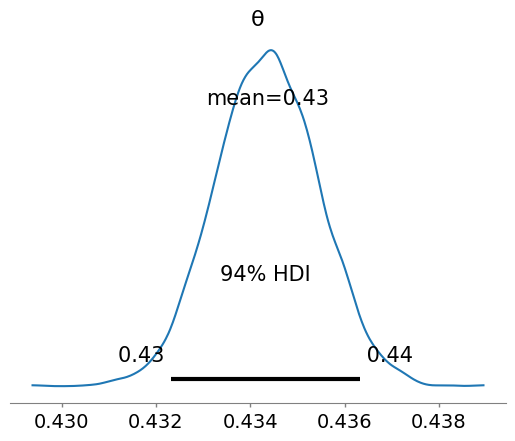

In [ ]:
az.plot_posterior(idata_Rrp_data)

Conclusion: The mean proportion of 5 star ratings for RRP books is most likely .43. My guess was that the proportion was the same as the average star rating for the original Percy Jackson series, which is .4389. These are very similar, likely becuase I weighted the prior pretty heavily in my posterior. Overall, I don't think this is a great model because the proportion of 5 star ratings isn't really that equivalent to the average rating. I don't think a binomial distribtution was the best way to do this because having options for 1 star, 2 stars, etc. would have been a better way to classify the ratings to make them less confusing.